# Demonstration 2: Cliff Walking

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sisyphus.envs import CliffWalking
from mpl_toolkits.axes_grid1 import make_axes_locatable
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5)
%matplotlib inline

## Value Iteration

/Users/szoro/Desktop/projects/SecretFunTimes/sisyphus/mdp/_dp.py:130: UserWarning: Reached maximum iterations.
  if self.n_iter == self.max_iter: warn('Reached maximum iterations.')


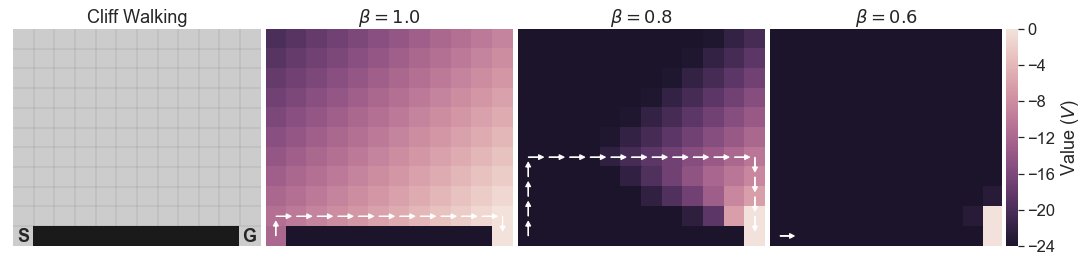

In [2]:
from sisyphus.mdp import ValueIteration
from sisyphus.viz import plot_policy, plot_cliff

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Simulation parameters.
betas = [1.0, 0.8, 0.6]

## Visualization parameters.
vmin, vmax = -24, 0

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Value iteration.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize environment.
gym = CliffWalking()

## Preallocate space.
V = np.zeros((3,*gym.shape))
pi = []

for i, beta in enumerate(betas):
    
    ## Initialize value iteration.
    qvi = ValueIteration(policy='betamax', gamma=1, beta=beta)
    
    ## Solve for Q-values.
    qvi = qvi.fit(gym)
    V[i] = qvi.V.reshape(gym.shape)
    
    ## Solve for policy.
    pi.append( qvi.pi )
    
## Fill in terminal states.
V[:,-1, 1:] = -100
V[:,-1, -1] = 0

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plotting.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    
## Initialize figure.
fig = plt.figure(figsize=(15,3.5))
cmap = sns.cubehelix_palette(dark=0.1, light=0.9, reverse=True, as_cmap=True)

## Initialize plots and divider.
gs = gridspec.GridSpec(1,4)
gs.update(left=0.01, right=0.94, bottom=0.04, top=0.9, hspace=0, wspace=0.02)

## Plot environment.
ax = plot_cliff(plt.subplot(gs[0]))

## Iteratively plot.
for i, beta in enumerate(betas):
    
    ## Initialize canvas.
    ax = plt.subplot(gs[i+1])
    
    ## Plot value map.
    if i < 2: 
        sns.heatmap(V[i], cmap=cmap, vmin=vmin, vmax=vmax, cbar=False, ax=ax)
    else:
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        sns.heatmap(V[i], cmap=cmap, vmin=vmin, vmax=vmax, cbar=True, ax=ax, cbar_ax=cax)
    
    ## Plot policy.
    ax = plot_policy(ax, gym, pi[i])
    
    ## Clean up image.
    ax.set(xticklabels=[], yticklabels=[], title=r'$\beta=%0.1f$' %beta)

## Update colobar.
cbar = ax.collections[0].colorbar
cbar.set_label(r'Value ($V$)')
    
plt.savefig('figures/02_cliff.png', dpi=180)